In [2]:
import pandas as pd

In [268]:
df = pd.read_csv('stock_data_final.csv')
# df = pd.read_csv('stock_data_neutral.csv')
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
df.set_index('date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,pos_score,neg_score,neu_score
date,,,,,,,,,,
2018-05-21,47.000000,47.317501,46.727501,46.907501,44.539970,73603200,negative,0.022010,0.703944,0.274046
2018-05-22,47.095001,47.220001,46.695000,46.790001,44.428417,60962800,neutral,0.100734,0.172068,0.727198
2018-05-23,46.587502,47.125000,46.439999,47.090000,44.713261,80233600,neutral,0.031859,0.249949,0.718193
2018-05-24,47.192501,47.209999,46.552502,47.037498,44.663403,92936000,neutral,0.070283,0.018399,0.911318
2018-05-25,47.057499,47.412498,46.912498,47.145000,44.765484,69844000,neutral,0.284922,0.120878,0.594200


In [269]:
len(df)

1605

In [270]:
df.sentiment.value_counts()

sentiment
neutral     1313
negative     167
positive     125
Name: count, dtype: int64

<Axes: xlabel='date'>

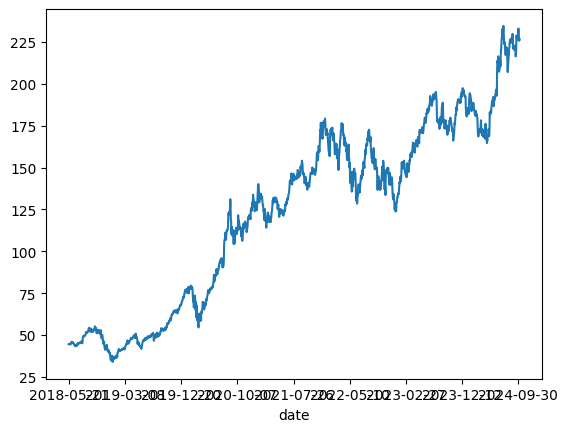

In [272]:
df["Adj Close"].plot()
# df.score.plot()

In [273]:
# 1 if price increased next day, 0 if price decreased next day
# df["Next Day"] = df["Adj Close"].shift(-1)
df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

# ohe_sentiment = pd.get_dummies(df['sentiment'], prefix='sentiment')
# df = pd.concat([df.drop('sentiment', axis=1), ohe_sentiment], axis=1)

df.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,pos_score,neg_score,neu_score,target
date,,,,,,,,,,,
2018-05-21,47.000000,47.317501,46.727501,46.907501,44.539970,73603200,-1,0.022010,0.703944,0.274046,0
2018-05-22,47.095001,47.220001,46.695000,46.790001,44.428417,60962800,0,0.100734,0.172068,0.727198,1
2018-05-23,46.587502,47.125000,46.439999,47.090000,44.713261,80233600,0,0.031859,0.249949,0.718193,0
2018-05-24,47.192501,47.209999,46.552502,47.037498,44.663403,92936000,0,0.070283,0.018399,0.911318,1
2018-05-25,47.057499,47.412498,46.912498,47.145000,44.765484,69844000,0,0.284922,0.120878,0.594200,0


In [274]:
# add sentiment from previous three days
df['sentiment_1D'] = df['sentiment'].shift(1)  
df['sentiment_2D']= df['sentiment'].shift(2)  
df['sentiment_3D']= df['sentiment'].shift(3)

# df["vol_change"] = df["Volume"].pct_change()
# df["return"] = df["Adj Close"].pct_change()

# drop open, high, low, close,
df.drop(['Open', 'High', 'Low', 'Close', "Volume" ], axis=1, inplace=True) 

df.head()

,Adj Close,sentiment,pos_score,neg_score,neu_score,target,sentiment_1D,sentiment_2D,sentiment_3D
date,,,,,,,,,
2018-05-21,44.539970,-1,0.022010,0.703944,0.274046,0,NaN,NaN,NaN
2018-05-22,44.428417,0,0.100734,0.172068,0.727198,1,-1.0,NaN,NaN
2018-05-23,44.713261,0,0.031859,0.249949,0.718193,0,0.0,-1.0,NaN
2018-05-24,44.663403,0,0.070283,0.018399,0.911318,1,0.0,0.0,-1.0
2018-05-25,44.765484,0,0.284922,0.120878,0.594200,0,0.0,0.0,0.0


In [275]:
# drop rows with NaN values
df.dropna(inplace=True)


In [276]:
len(df)

1602

In [277]:
df.head()

,Adj Close,sentiment,pos_score,neg_score,neu_score,target,sentiment_1D,sentiment_2D,sentiment_3D
date,,,,,,,,,
2018-05-24,44.663403,0,0.070283,0.018399,0.911318,1,0.0,0.0,-1.0
2018-05-25,44.765484,0,0.284922,0.120878,0.594200,0,0.0,0.0,0.0
2018-05-29,44.604061,1,0.401789,0.281523,0.316688,0,0.0,0.0,0.0
2018-05-30,44.509121,-1,0.015888,0.934005,0.050107,0,1.0,0.0,0.0
2018-05-31,44.359566,0,0.289203,0.195969,0.514828,1,-1.0,1.0,0.0


Models
1. Logsitic Regression
2. Random forest
3. See some ensembling methods

Logistic

In [278]:
# logisitic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y = df['target']
X = df.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scale the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [279]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [280]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 15, 134],
       [ 16, 156]], dtype=int64)

In [281]:
# accuracy, precision, recall, f1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5327102803738317
0.5379310344827586
0.9069767441860465
0.6753246753246753


0.5156079288278446

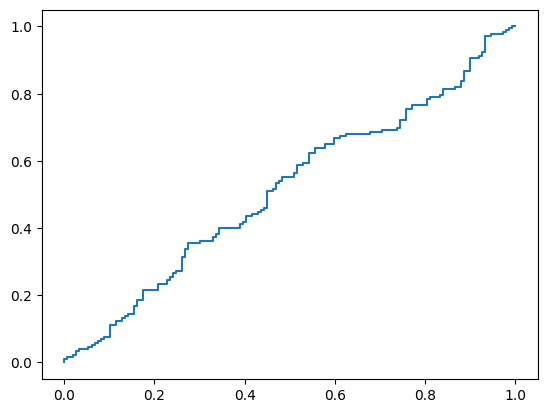

In [282]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)

roc_auc_score(y_test, y_pred_proba)

Random forest

In [283]:
# random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [284]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# accuracy, precision, recall, f1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5264797507788161
0.5543478260869565
0.5930232558139535
0.5730337078651685


0.5539644139222725

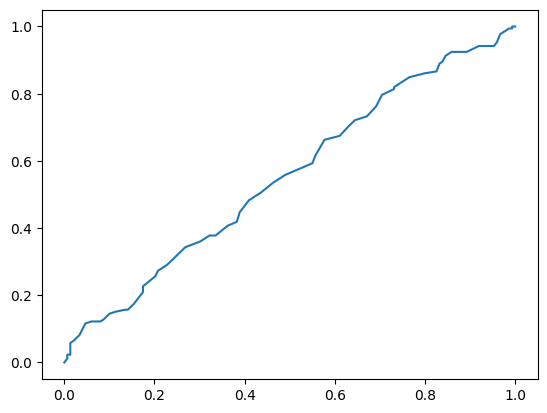

In [285]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)

roc_auc_score(y_test, y_pred_proba)

In [262]:
# # fine-tune the model
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30]
# }

# model = RandomForestClassifier()
# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# grid_search.best_params_

Catboost

In [263]:
# !pip install xgboost
# !pip install catboost

In [286]:
# catboost
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Learning rate set to 0.011451
0:	learn: 0.6926038	total: 3.42ms	remaining: 3.42s
1:	learn: 0.6921265	total: 5.81ms	remaining: 2.9s
2:	learn: 0.6918124	total: 8.72ms	remaining: 2.9s
3:	learn: 0.6912264	total: 11.6ms	remaining: 2.89s
4:	learn: 0.6909315	total: 14ms	remaining: 2.78s
5:	learn: 0.6908786	total: 15.4ms	remaining: 2.56s
6:	learn: 0.6904070	total: 18.2ms	remaining: 2.58s
7:	learn: 0.6898489	total: 20.6ms	remaining: 2.56s
8:	learn: 0.6894638	total: 22.4ms	remaining: 2.47s
9:	learn: 0.6891936	total: 23.5ms	remaining: 2.33s
10:	learn: 0.6889029	total: 25.3ms	remaining: 2.27s
11:	learn: 0.6885023	total: 26.7ms	remaining: 2.2s
12:	learn: 0.6882687	total: 27.8ms	remaining: 2.11s
13:	learn: 0.6876265	total: 29.7ms	remaining: 2.09s
14:	learn: 0.6872486	total: 31.7ms	remaining: 2.08s
15:	learn: 0.6867061	total: 33.6ms	remaining: 2.07s
16:	learn: 0.6863791	total: 35.2ms	remaining: 2.04s
17:	learn: 0.6860471	total: 36.7ms	remaining: 2s
18:	learn: 0.6857840	total: 38.1ms	remaining: 1.97s


In [287]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# accuracy, precision, recall, f1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# y_pred_proba = model.predict_proba(X_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# plt.plot(fpr, tpr)

print(roc_auc_score(y_test, y_pred_proba))

0.5233644859813084
0.5492227979274611
0.6162790697674418
0.5808219178082191
0.5539644139222725


In [306]:
from sklearn.decomposition import PCA

def pca_analysis(model):
    accuracy = []
    precision = []
    recall = []
    f1 = []
    roc_auc = []

    for comp in range(1, 8):
        pca = PCA(n_components=comp)

        X_pca = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))

        y_pred_proba = model.predict_proba(X_test)[:,1]
        roc_auc.append(roc_auc_score(y_test, y_pred_proba))

    return accuracy, precision, recall, f1, roc_auc

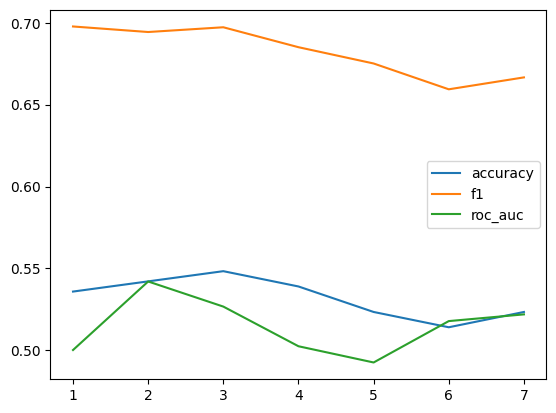

In [307]:
# logistic regression
model = LogisticRegression()
accuracy, precision, recall, f1, roc_auc = pca_analysis(model)

# plot the results
import matplotlib.pyplot as plt

plt.plot(range(1, 8), accuracy, label='accuracy')
# plt.plot(range(1, 8), precision, label='precision')
# plt.plot(range(1, 8), recall, label='recall')
plt.plot(range(1, 8), f1, label='f1')
plt.plot(range(1, 8), roc_auc, label='roc_auc')
plt.legend()
plt.show()

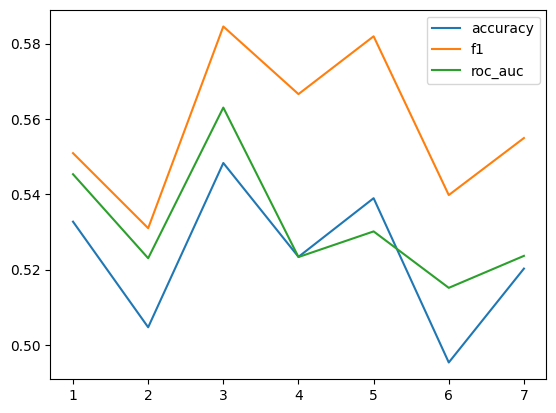

In [310]:
model = RandomForestClassifier(n_estimators=200, max_depth=100)
accuracy, precision, recall, f1, roc_auc = pca_analysis(model)

# plot the results
import matplotlib.pyplot as plt

plt.plot(range(1, 8), accuracy, label='accuracy')
# plt.plot(range(1, 8), precision, label='precision')
# plt.plot(range(1, 8), recall, label='recall')
plt.plot(range(1, 8), f1, label='f1')
plt.plot(range(1, 8), roc_auc, label='roc_auc')
plt.legend()
plt.show()

Learning rate set to 0.050097
0:	learn: 0.6925102	total: 43.8ms	remaining: 8.72s
1:	learn: 0.6916448	total: 273ms	remaining: 27s
2:	learn: 0.6905637	total: 485ms	remaining: 31.8s
3:	learn: 0.6898492	total: 594ms	remaining: 29.1s
4:	learn: 0.6891344	total: 817ms	remaining: 31.8s
5:	learn: 0.6889015	total: 818ms	remaining: 26.5s
6:	learn: 0.6881162	total: 1.04s	remaining: 28.7s
7:	learn: 0.6878255	total: 1.04s	remaining: 25s
8:	learn: 0.6874033	total: 1.1s	remaining: 23.4s
9:	learn: 0.6868420	total: 1.12s	remaining: 21.2s
10:	learn: 0.6862352	total: 1.13s	remaining: 19.5s
11:	learn: 0.6857330	total: 1.36s	remaining: 21.3s
12:	learn: 0.6854280	total: 1.39s	remaining: 20s
13:	learn: 0.6851305	total: 1.41s	remaining: 18.7s
14:	learn: 0.6843947	total: 1.63s	remaining: 20.1s
15:	learn: 0.6842667	total: 1.63s	remaining: 18.8s
16:	learn: 0.6838138	total: 1.85s	remaining: 19.9s
17:	learn: 0.6832774	total: 2.07s	remaining: 20.9s
18:	learn: 0.6824917	total: 2.29s	remaining: 21.8s
19:	learn: 0.6820

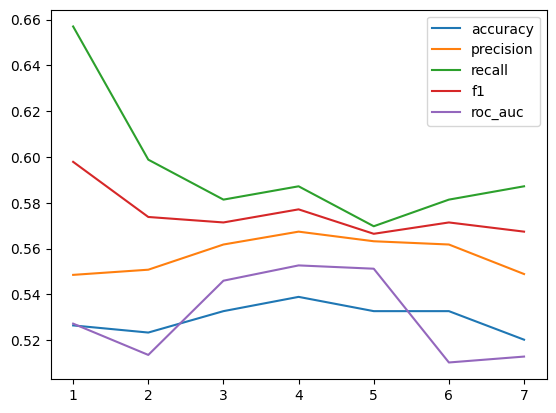

In [312]:
# catboost
model = CatBoostClassifier(n_estimators=200, max_depth=15)
accuracy, precision, recall, f1, roc_auc = pca_analysis(model)

# plot the results
import matplotlib.pyplot as plt

plt.plot(range(1, 8), accuracy, label='accuracy')
plt.plot(range(1, 8), precision, label='precision')
plt.plot(range(1, 8), recall, label='recall')
plt.plot(range(1, 8), f1, label='f1')
plt.plot(range(1, 8), roc_auc, label='roc_auc')
plt.legend()
plt.show()

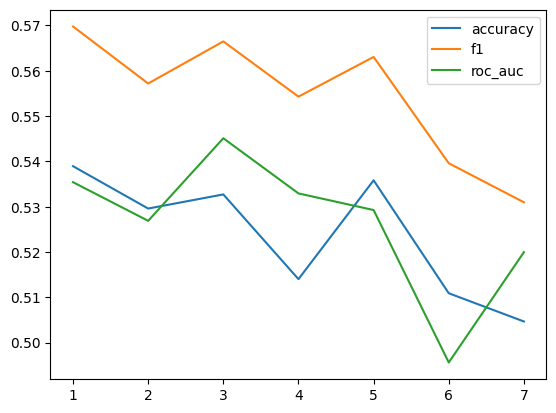

In [315]:
# XGBoost
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=200, max_depth=15)
accuracy, precision, recall, f1, roc_auc = pca_analysis(model)

# plot the results
import matplotlib.pyplot as plt

plt.plot(range(1, 8), accuracy, label='accuracy')
# plt.plot(range(1, 8), precision, label='precision')
# plt.plot(range(1, 8), recall, label='recall')
plt.plot(range(1, 8), f1, label='f1')
plt.plot(range(1, 8), roc_auc, label='roc_auc')
plt.legend()
plt.show()
